In [2]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import requests
import concurrent.futures
from collections import Counter


In [ ]:
def exploratory_stats(arrays, array_names):
    stats_list = []
    for idx, array in enumerate(list(arrays)):
        array_name = array_names[idx]
        np_array = np.array(array, dtype=float)  # Ensure the array has a float dtype to handle NaNs

        mean = np.nanmean(np_array).round(2)
        median = np.nanmedian(np_array).round(2)
        min_value = np.nanmin(np_array).round(2)
        max_value = np.nanmax(np_array).round(2)
        std_dev = np.nanstd(np_array).round(2)
        q25 = np.nanpercentile(np_array, 25).round(2)
        q75 = np.nanpercentile(np_array, 75).round(2)

        stats_list.append([array_name, q25,mean,  q75, std_dev,  min_value,median, max_value])

    stats_df = pd.DataFrame(stats_list, columns=['Article Category','1st Quantile', 'Mean',  '3rd Quantile', 'Standard Deviation',  'Min','Median', 'Max'])
    
    return stats_df

In [4]:
whole_dict = {
    'protected': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/0_protected_titles.csv')
    },
    'excellent': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/0_excellent_titles.csv')
    },
    'readworthy': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/0_readworthy_titles.csv')
    },
    'random': {
        'df':
        pd.read_csv(f'data/data_files/pipeline_steps/random_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/random_articles/0_random_titles.csv')
    },
}


In [5]:
def print_common_items(list1, list2):
    # Convert the lists to sets
    set1 = set(list1)
    set2 = set(list2)

    # Find the intersection
    common_items = set1 & set2
    
    common_count = []
    # Print the common items
    for item in common_items:
        common_count.append(item)
    return common_count

In [6]:
a = print_common_items(whole_dict['excellent']['titles']['title'],
                   whole_dict['readworthy']['titles']['title'])
print((a))

['Blackpool Tower', 'Höllengebirge', 'Choanozoa']


## Plotting on article level

In [7]:
randoms = pd.read_csv(
    f'data/data_files/pipeline_steps/random_articles/5.1_sentences_exploded.csv')
len(randoms)


707478

In [8]:
excellent_art = pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv')
readworthy_art = pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv')
protected_art = pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv')
random_art = pd.read_csv(
    f'data/data_files/pipeline_steps/random_articles/1_all_articles_fetched.csv')



max_len = max(len(excellent_art),len(readworthy_art),len(protected_art),len(random_art))
new_index = np.arange(max_len)

# excellent_art = excellent_art.reindex(new_index)
# protected_art = protected_art.reindex(new_index)

name_list = []
category_name_list = []

for key,value in whole_dict.items():
    name_list.append(key+' Articles')
    category_name_list.append(key)

char_count_article_df = pd.DataFrame()


### Word Count

In [17]:
for key,value in whole_dict.items():
    whole_dict[key]['word_count'] = np.array(value['df']['sub_texts'].apply(lambda x: len(str(x).split())))
    whole_dict[key]['word_count'] = np.concatenate([
        whole_dict[key]['word_count'],
        np.array([np.nan] * (max_len - len(whole_dict[key]['word_count'])))
    ])
    print(key)
    print(whole_dict[key]['df'])


protected
      Unnamed: 0                          title   bytes   
0              0                     Rudolf Heß   86509  \
1              1                           Popo     805   
2              2                         Kanake     309   
3              3                          Bitch    5369   
4              4                        Fisting    7432   
...          ...                            ...     ...   
2840        2840  Marie-Agnes Strack-Zimmermann   28388   
2841        2841                     Mike Tyson   83016   
2842        2842                       Toilette   51005   
2843        2843                    Braunwasser    1238   
2844        2844                   Zirkumzision  223530   

                                              sub_texts  
0     Rudolf Walter Richard Heß [] (* 26 April== 189...  
1                              Popo ist \nSiehe auch:\n  
2                    Kanake steht für:\n\nSiehe auch:\n  
3     Bitch  ist ein Begriff aus dem Englischen, 

In [10]:
word_count_article_protected = np.array(protected_art['sub_texts'].apply(lambda x: len(str(x).split())))
word_count_article_excellent = np.array(excellent_art['sub_texts'].apply(lambda x: len(str(x).split())))
word_count_article_readworthy = np.array(readworthy_art['sub_texts'].apply(
    lambda x: len(str(x).split())))
word_count_article_protected = np.concatenate([word_count_article_protected , np.array([np.nan] * (
    max_len - len(word_count_article_protected)))])
word_count_article_excellent = np.concatenate([word_count_article_excellent , np.array([np.nan] * (
    max_len - len(word_count_article_excellent)))])
word_count_article_readworthy = np.concatenate([word_count_article_readworthy , np.array([np.nan] * (
    max_len - len(word_count_article_readworthy)))])

word_count_article_random = np.array(random_art['sub_texts'].apply(
    lambda x: len(str(x).split())))
word_count_article_random = np.concatenate([word_count_article_random, np.array([np.nan] * (
    max_len - len(word_count_article_random)))])



 



In [18]:
word_count_list = [
    word_count_article_protected, 
    word_count_article_excellent, 
    word_count_article_readworthy,
    word_count_article_random
]


In [22]:
# for key,value in whole_dict.items():
#     print(whole_dict[key]['word_count'])
ab = exploratory_stats([
    word_count_article_protected, word_count_article_excellent, word_count_article_readworthy,
    word_count_article_random
], category_name_list)
display(ab)

,Article Category,1st Quantile,Mean,3rd Quantile,Standard Deviation,Min,Median,Max
0,protected,318.00,2419.74,2997.00,3524.99,1.0,1058.0,33027.0
1,excellent,2455.50,4946.90,6567.00,3765.82,1.0,4136.0,48436.0
2,readworthy,1657.75,3480.13,4405.25,2987.06,1.0,2683.5,33027.0
3,random,88.00,343.46,396.00,591.05,0.0,206.0,20107.0


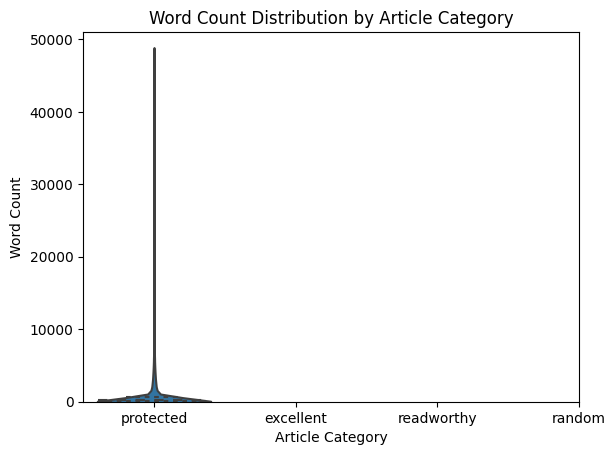

In [ ]:
ax = sns.violinplot(data=[
    word_count_list
],
                    inner='quartile')

# Set plot title and labels
plt.title('Word Count Distribution by Article Category')
plt.xlabel('Article Category')
plt.ylabel('Word Count')
plt.xticks([0, 1, 2,3], category_name_list)
ax.set_ylim(-1, 51000)
# Show the plot
plt.show()

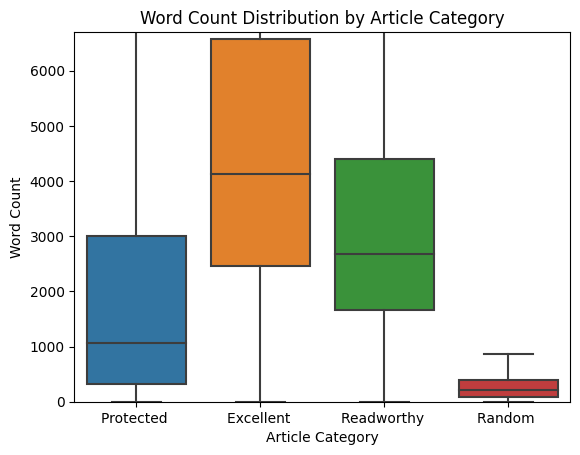

In [23]:
ax = sns.boxplot(data=[
    word_count_article_protected, word_count_article_excellent, word_count_article_readworthy,
    word_count_article_random
],
                 showfliers=False)

# Set plot title and labels
plt.title('Word Count Distribution by Article Category')
plt.xlabel('Article Category')
plt.ylabel('Word Count')
plt.xticks([0, 1, 2,3], ['Protected ', 'Excellent ', 'Readworthy ', 'Random '])
ax.set_ylim(-1,6700)
# Show the plot
plt.show()

### Character count

In [24]:
char_count_article_protected = protected_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_excellent = excellent_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_readworthy = readworthy_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_random = random_art['sub_texts'].apply(lambda x: len(str(x)))

In [25]:
char_count_article_protected = np.concatenate([
    char_count_article_protected,
    np.array([np.nan] * (max_len - len(char_count_article_protected)))
])
char_count_article_excellent = np.concatenate([
    char_count_article_excellent,
    np.array([np.nan] * (max_len - len(char_count_article_excellent)))
])
char_count_article_readworthy = np.concatenate([
    char_count_article_readworthy,
    np.array([np.nan] * (max_len - len(char_count_article_readworthy)))
])
char_count_article_random = np.concatenate([
    char_count_article_random,
    np.array([np.nan] * (max_len - len(char_count_article_random)))
])


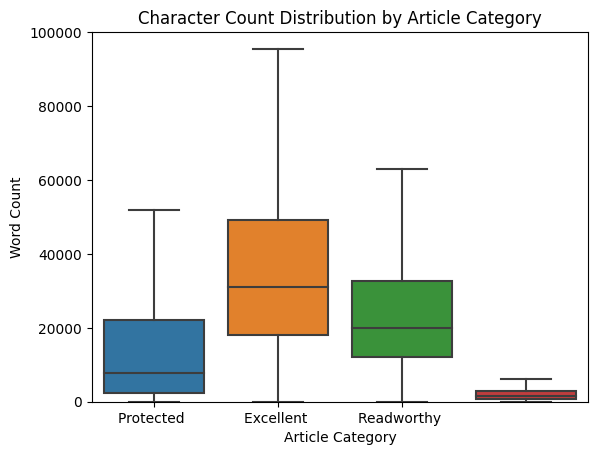

In [28]:
ax = sns.boxplot(data=[
    char_count_article_protected, char_count_article_excellent, char_count_article_readworthy,
    char_count_article_random
],
                    showfliers=False)

# Set plot title and labels
plt.title('Character Count Distribution by Article Category')
plt.xlabel('Article Category')
plt.ylabel('Word Count')
plt.xticks([0, 1, 2], ['Protected ', 'Excellent ', 'Readworthy '])
ax.set_ylim(0, 100000)


# Show the plot
plt.show()

## Characters per Word

In [30]:
protected_charwords=np.nansum(char_count_article_protected)/np.nansum(word_count_article_protected)
excellent_charwords=np.nansum(char_count_article_excellent)/np.nansum(word_count_article_excellent)
readworthy_charwords=np.nansum(char_count_article_readworthy)/np.nansum(word_count_article_readworthy)
random_charwords = np.nansum(char_count_article_random) / np.nansum(
    word_count_article_random)


In [31]:
print(
    f"protected: {protected_charwords}, excellent: {excellent_charwords}, readworthy: {readworthy_charwords}, random: {random_charwords}"
)


protected: 7.499377993280236, excellent: 7.447989445864211, readworthy: 7.434205173304958, random: 7.272773582443468


In [3]:
df=pd.read_csv(f'data/data_files/pipeline_steps/random_articles/7.1_maskadded.csv')

In [8]:
df.value_counts('quot_label')

quot_label
False    576516
True     130962
Name: count, dtype: int64